## Import Libraries

In [122]:
#import math
import pandas as pd
import numpy as np
#import operator
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers
import os

## Prepare Dataframes

### Renan data frame

In [123]:
renan = pd.DataFrame()

# for each file in directory, create a new dataframe
folder = "../letters/Renan"
for directory, subfolder, files in os.walk(folder):     
     for file in files:
          targetLetter = file.replace(".csv","")
          # Create a dataframe without header and drop last column
          df = pd.DataFrame()
          df = pd.read_csv(os.path.join(os.path.realpath(directory), file), header=None, sep=";")
          df = df.drop(180, axis=1)
          df["Target letter"] = targetLetter
          df["Target person"] = "Renan"

          renan = pd.concat([renan,df])
          
renan = renan.reset_index(drop=True)  

### Guilherme dataframe

In [124]:
guilherme = pd.DataFrame()

# for each file in directory, create a new dataframe
folder = "../letters/Guilherme"
for directory, subfolder, files in os.walk(folder):     
     for file in files:
          targetLetter = file.replace(".csv","")
          # Create a dataframe without header and drop last column
          df = pd.DataFrame()
          df = pd.read_csv(os.path.join(os.path.realpath(directory), file), header=None, sep=";")
          df = df.drop(180, axis=1)
          df["Target letter"] = targetLetter
          df["Target person"] = "Guilherme"

          guilherme = pd.concat([guilherme,df])
          
guilherme = guilherme.reset_index(drop=True) 

### dataframe Claudinei

In [125]:
claudinei = pd.DataFrame()

# for each file in directory, create a new dataframe
folder = "../letters/Claudinei"
for directory, subfolder, files in os.walk(folder):     
     for file in files:
          targetLetter = file.replace(".csv","")
          # Create a dataframe without header and drop last column
          df = pd.DataFrame()
          df = pd.read_csv(os.path.join(os.path.realpath(directory), file), header=None, sep=";")
          df = df.drop(180, axis=1)
          df["Target letter"] = targetLetter
          df["Target person"] = "Claudinei"

          claudinei = pd.concat([claudinei,df])
          
claudinei = claudinei.reset_index(drop=True)

### agroup dataframe's

In [147]:
groupDataframe = pd.concat([renan,guilherme, claudinei])
groupDataframe = groupDataframe.sample(frac=1)
groupDataframe = groupDataframe.reset_index(drop=True)
groupDataframe


,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,Target letter,Target person
0,1,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,I,Guilherme
1,0,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,E,Renan
2,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,E,Renan
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,O,Guilherme
4,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,U,Guilherme
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,E,Claudinei
3638,1,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,A,Guilherme
3639,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,U,Renan
3640,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,A,Renan


# 2 - Training

#### separate input "X" and output "Y" data

In [148]:
X = groupDataframe.iloc[:,0:180]
X

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,1,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3638,1,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3639,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3640,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [149]:
Y = groupDataframe.iloc[:,180]
Y

0       I
1       E
2       E
3       O
4       U
       ..
3637    E
3638    A
3639    U
3640    A
3641    E
Name: Target letter, Length: 3642, dtype: object

### Neural Network model in keras TF

In [161]:
import matplotlib.pyplot as plt
Yc = np.ndarray((3642,5))
Yc[:,0]= np.int_(Y == 'A')
Yc[:,1]= np.int_(Y == 'E')
Yc[:,2]= np.int_(Y == 'I')
Yc[:,3]= np.int_(Y == 'O')
Yc[:,4]= np.int_(Y == 'U')
#Yc.append( np.float_(Y == 'E') )
#Yc.append( np.float_(Y == 'I') )
#Yc.append( np.float_(Y == 'O') )
#Yc.append( np.float_(Y == 'U') )

Yc

#Yd = [[Yc[j][i] for j in range(len(Yc))] for i in range(len(Yc[0]))]
#Yd
#plt.plot(Yc)

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [189]:
"""def get_model():
   X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
      #x_values=np.groupdataframe.iloc[:,0:180]
   #y_values=np.groupDataframe.iloc[:,180]  

 # divide dados em treinamento, validação e teste
   #TRAIN_SPLIT =  int(0.6 * x_values)
   #TEST_SPLIT = int(0.2 * y_values + TRAIN_SPLIT)

   #x_train, x_test, x_validate= np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
   #y_train, y_test, y_validate= np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])
    
# cria uma rede neural de 2 camadas de 16 neurônicos cada
   model = tf.keras.Sequential()
   model.add(layers.Dense(180, activation='relu', input_shape=(1,)))
   model.add(layers.Dense(33, activation='relu'))
   model.add(layers.Dense(1))
   model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
   model.fit( X_train, np.ravel(y_train))#x_train, y_train, epochs=200, batch_size=16, validation_data=(x_validate, y_validate))
   #model.fit(X, Y, epochs=200, batch_size=16, validation_data=(test_size=0.3, random_state=1))
   return model
   """
SAMPLES = len(Yc)
np.random.seed(1337)
x_values = X.to_numpy()
# sorteia e adiciona ruído
 
# divide dados em treinamento, validação e teste
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(Yc, [TRAIN_SPLIT, TEST_SPLIT])
# cria uma rede neural de 2 camadas de 16 neurônicos cada
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(None,180)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(5))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.fit(x_train, y_train, epochs=20, batch_size=16, validation_data=(x_validate, y_validate))

Epoch 1/20


137/137 [==============================] - ETA: 0s - loss: 0.1294 - mae: 0.2382WARNING:tensorflow:Model was constructed with shape (None, None, 180) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 180), dtype=tf.float32, name='dense_24_input'), name='dense_24_input', description="created by layer 'dense_24_input'"), but it was called on an input with incompatible shape (None, 180).


137/137 [==============================] - 1s 3ms/step - loss: 0.1294 - mae: 0.2382 - val_loss: 0.0816 - val_mae: 0.2059
Epoch 2/20
137/137 [==============================] - 0s 2ms/step - loss: 0.0633 - mae: 0.1792 - val_loss: 0.0539 - val_mae: 0.1653
Epoch 3/20
137/137 [==============================] - 0s 2ms/step - loss: 0.0444 - mae: 0.1457 - val_loss: 0.0433 - val_mae: 0.1453
Epoch 4/20
137/137 [==============================] - 0s 2ms/step - loss: 0.0358 - mae: 0.1263 - val_loss: 0.0352 - val_mae: 0.1255
Epoch 5/20
137/137 [==============================] - 0s 2ms/step - loss: 0.0306 - mae: 0.1138 - val_loss: 0.0308 - val_mae: 0.1181
Epoch 6/20
137/137 [==============================] - 0s 2ms/step - loss: 0.0268 - mae: 0.1047 - val_loss: 0.0274 - val_mae: 0.1086
Epoch 7/20
137/137 [==============================] - 0s 2ms/step - loss: 0.0241 - mae: 0.0976 - val_loss: 0.0253 - val_mae: 0.1028
Epoch 8/20
137/137 [==============================] - 0s 2ms/step - loss: 0.0220 - mae:

In [152]:
def test_model(model, verbose=False):
    #x_test = test_size=0.3
    y_test = random_state=1
    y_pred= model.predict(x_test)
    print('MAE', np.abs(y_pred - y_test).mean())

In [153]:
#model = get_model() 
test_model(model, verbose=True)
converter = tf.lite.TFLiteConverter.from_keras_model(model) 
tflite_model = converter.convert() 
# Save the model to disk 
open("sine_model.tflite", "wb").write(tflite_model)

7/7 [==============================] - 0s 1ms/step
MAE 0.80846536


INFO:tensorflow:Assets written to: /tmp/tmp1dpxk2x0/assets


INFO:tensorflow:Assets written to: /tmp/tmp1dpxk2x0/assets
2022-12-03 12:23:54.610955: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-12-03 12:23:54.610985: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-12-03 12:23:54.611165: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmp1dpxk2x0
2022-12-03 12:23:54.612778: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-12-03 12:23:54.612796: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmp1dpxk2x0
2022-12-03 12:23:54.619583: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2022-12-03 12:23:54.658312: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: /tmp/tmp1dpxk2x0
2022-12-03 12:23:54.670986: I tensorflow/cc/saved_model/loader.cc:305] SavedModel

20460

In [154]:
r = model.predict(x_test)

7/7 [==============================] - 0s 1ms/step


In [155]:
print(r[2])
print(y_test[2])

[ 0.88401264 -0.00687043  0.01774746  0.12838027 -0.01910912]
[1. 0. 0. 0. 0.]


In [157]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.xscale(y_test, r)
plt.title('Classifier neural network')
plt.show()

TypeError: xscale() takes 1 positional argument but 2 were given

23/23 [==============================] - 0s 978us/step


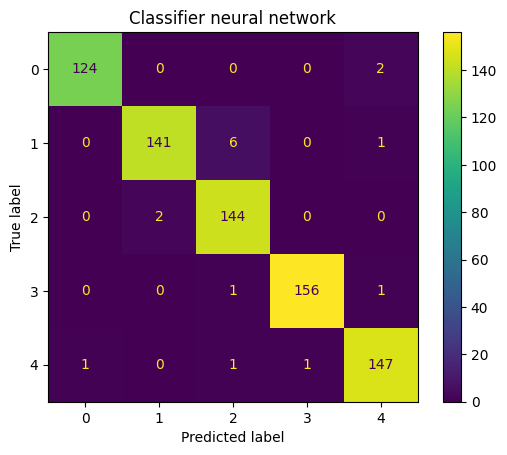

In [190]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
res = model.predict(x_test)
m = ['A','E','I','O','U']
y_pred = res.argmax(1).astype(int)
y_val = y_test.argmax(1).astype(int)


ConfusionMatrixDisplay.from_predictions(y_pred, y_val)
plt.title('Classifier neural network')
plt.show()

In [216]:
for x in range(len(y_val)):
    if (y_pred[x] != y_val[x]):
        print(y_val[x], y_pred[x])
        print(x, res[x])


2 1
24 [ 0.01887802  0.63562644  0.32479104 -0.06378292  0.07859336]
0 4
62 [ 0.15929346  0.11894745  0.08807068 -0.00098195  0.55938655]
2 1
79 [0.00384342 0.7456136  0.0396096  0.10447711 0.12380627]
3 4
85 [ 0.24671574  0.0429704  -0.16132559  0.3632551   0.40698415]
4 0
97 [ 0.57957894  0.09308399  0.1939912  -0.02714451  0.11369501]
4 1
141 [0.25093594 0.45547214 0.25288147 0.09968531 0.3116594 ]
2 1
149 [-0.00878498  0.52474993  0.48741865  0.00549029 -0.01576224]
2 1
161 [ 0.05712964  0.8055277   0.10083593 -0.10614914  0.10034719]
4 3
299 [0.19137557 0.13891798 0.04094996 0.5023304  0.34480065]
1 2
402 [ 0.04919592  0.15644234  0.8503489  -0.13013287  0.05543469]
4 0
431 [ 0.81691813 -0.0151985   0.10189222  0.10136753 -0.02451715]
2 4
478 [-0.22639449  0.05798121  0.11890461  0.17510806  0.69521743]
2 1
539 [-0.20506647  0.6439394  -0.00072537  0.5028657  -0.00619771]
1 2
553 [0.00411098 0.41907868 0.5427812  0.01248324 0.05117254]
2 1
598 [-0.00212822  0.5798793   0.4228838  

In [188]:
len(Yc)

3642